# <center>**Análise de dados - Netflix**

<center><img src="https://observatoriodeseries.uol.com.br/wp-content/uploads/2020/05/Novo-Projeto-61.jpg" width=500></center>



Esse projeto foi inspirado no artigo tutorial do Dataquest. 

Lá você encontra um tutorial de como baixar seus dados da Netflix para realizar sua análise. Acesse clicando [aqui.](https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/) 

In [ ]:
# importando as bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Conhecendo e Preparando os Dados**

In [ ]:
df = pd.read_csv('ViewingActivity.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Bea,2020-11-10 04:46:56,00:00:59,NaN,Friends: Temporada 8: Aquele com o boato (Epis...,NaN,Sony PS4 Pro,00:01:04,00:01:04,BR (Brazil)
1,Bea,2020-11-10 04:21:12,00:08:48,Autoplayed: user action: Unspecified;,Friends: Temporada 7: Aquele com o novo cérebr...,NaN,Sony PS4 Pro,00:08:48,00:08:48,BR (Brazil)
2,Bea,2020-11-10 03:24:08,00:21:00,Autoplayed: user action: Unspecified;,Friends: Temporada 7: Aquele em que todos faze...,NaN,Sony PS4 Pro,00:21:53,00:21:53,BR (Brazil)
3,Bea,2020-11-10 03:10:44,00:13:22,Autoplayed: user action: Unspecified;,Friends: Temporada 7: Aquele em que Rosita mor...,NaN,Sony PS4 Pro,00:21:53,00:21:53,BR (Brazil)
4,Bea,2020-11-10 02:48:43,00:01:54,Autoplayed: user action: None;,Brooklyn Nine-Nine: Temporada 6: A minha palav...,NaN,Sony PS4 Pro,00:01:54,00:01:54,BR (Brazil)


In [ ]:
df.shape 

(3743, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             3743 non-null   object
 1   Start Time               3743 non-null   object
 2   Duration                 3743 non-null   object
 3   Attributes               984 non-null    object
 4   Title                    3743 non-null   object
 5   Supplemental Video Type  401 non-null    object
 6   Device Type              3743 non-null   object
 7   Bookmark                 3743 non-null   object
 8   Latest Bookmark          3743 non-null   object
 9   Country                  3743 non-null   object
dtypes: object(10)
memory usage: 292.5+ KB


In [ ]:
# eliminando colunas que não serão utilizadas na análise
df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type',
         'Bookmark', 'Latest Bookmark', 'Country'], axis=1, inplace=True)
df.head()

,Start Time,Duration,Title
0,2020-11-10 04:46:56,00:00:59,Friends: Temporada 8: Aquele com o boato (Epis...
1,2020-11-10 04:21:12,00:08:48,Friends: Temporada 7: Aquele com o novo cérebr...
2,2020-11-10 03:24:08,00:21:00,Friends: Temporada 7: Aquele em que todos faze...
3,2020-11-10 03:10:44,00:13:22,Friends: Temporada 7: Aquele em que Rosita mor...
4,2020-11-10 02:48:43,00:01:54,Brooklyn Nine-Nine: Temporada 6: A minha palav...


In [ ]:
# renomeando a primeira coluna
df.columns = ['Start_Time', 'Duration', 'Title']

In [ ]:
# verificando a existencia de dados nulos
df.isna().values.any()

False

#### **Convertendo tipo Object em Datetime e Timedelta**

*   Converter `Start_Time` para Datetime (um formato de data e hora que o Pandas pode entender e realizar cálculos)
*   Converter `Start_Time` de UTC para nosso fuso horário local
*   Converter Duration para Timedelta (um formato de duração de tempo que o Pandas podem entender e realizar cálculos)






In [ ]:
df.dtypes

Start_Time    object
Duration      object
Title         object
dtype: object

Começando com a conversão `Start_Time` para datetime usando `pd.to_datetime()`



In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], utc=True)

df.dtypes

Start_Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

Adicionaremos o argumento opcional `utc=True` para que nossos dados de data e hora tenham o fuso horário UTC anexado a eles.  

Agora que temos essa coluna no formato correto, é hora de alterar o fuso horário para o horário local.

Podemos converter data e hora para qualquer fuso horário usando o `.tz_convert()`e passando um argumento com a string para o fuso horário que queremos converter.

Mas precisamos realizar mais um passo antes de utilizar essa função. Só podemos usar `.tz_convert()` em um DatetimeIndex, portanto, precisamos definir a coluna `Start_Time` como o índice usando `set_index()`.

In [ ]:
# mudando a coluna Start_Time para o índice do dataframe
df = df.set_index('Start_Time')

# convertendo o fuso horário UTC
df.index = df.index.tz_convert('America/Sao_Paulo')

# redefinindo o índice para que Start_Time se torne uma coluna novamente
df = df.reset_index()

df.head()

,Start_Time,Duration,Title
0,2020-11-10 02:46:56-02:00,00:00:59,Friends: Temporada 8: Aquele com o boato (Epis...
1,2020-11-10 02:21:12-02:00,00:08:48,Friends: Temporada 7: Aquele com o novo cérebr...
2,2020-11-10 01:24:08-02:00,00:21:00,Friends: Temporada 7: Aquele em que todos faze...
3,2020-11-10 01:10:44-02:00,00:13:22,Friends: Temporada 7: Aquele em que Rosita mor...
4,2020-11-10 00:48:43-02:00,00:01:54,Brooklyn Nine-Nine: Temporada 6: A minha palav...


Agora, vamos lidar com a coluna `Duration`. Isso é, como o nome sugere, uma duração - uma medida de uma extensão de tempo. Portanto, em vez de convertê-lo em uma data e hora, precisamos convertê-lo em um Timedelta, que é uma medida de duração de tempo que o pandas entende.

In [ ]:
df['Duration'] = pd.to_timedelta(df['Duration'])

df.dtypes

Start_Time    datetime64[ns, America/Sao_Paulo]
Duration                        timedelta64[ns]
Title                                    object
dtype: object

##**Análise de Dados Gerais**

In [ ]:
# criando novas colunas de "Season" e "Episode" utilizando a coluna Title
df[['Title_Name', 'Season', 'Episode']] = df['Title'].str.split(':', n=2, 
                                                                expand=True)

df.drop('Title', axis=1, inplace=True)
df.head()

,Start_Time,Duration,Title_Name,Season,Episode
0,2020-11-10 02:46:56-02:00,0 days 00:00:59,Friends,Temporada 8,Aquele com o boato (Episódio 9)
1,2020-11-10 02:21:12-02:00,0 days 00:08:48,Friends,Temporada 7,Aquele com o novo cérebro do Joey (Episódio 15)
2,2020-11-10 01:24:08-02:00,0 days 00:21:00,Friends,Temporada 7,Aquele em que todos fazem 30 anos (Episódio 14)
3,2020-11-10 01:10:44-02:00,0 days 00:13:22,Friends,Temporada 7,Aquele em que Rosita morre (Episódio 13)
4,2020-11-10 00:48:43-02:00,0 days 00:01:54,Brooklyn Nine-Nine,Temporada 6,A minha palavra contra a dele (Episódio 8)


In [ ]:
# criar novas colunas de "Weekday" e "Hour" utilizando a coluna Start_time 
# Monday=0, Sunday=6

df['Weekday'] = df['Start_Time'].dt.weekday
df['Hour'] = df['Start_Time'].dt.hour

df.head()

,Start_Time,Duration,Title_Name,Season,Episode,Weekday,Hour
0,2020-11-10 02:46:56-02:00,0 days 00:00:59,Friends,Temporada 8,Aquele com o boato (Episódio 9),1,2
1,2020-11-10 02:21:12-02:00,0 days 00:08:48,Friends,Temporada 7,Aquele com o novo cérebro do Joey (Episódio 15),1,2
2,2020-11-10 01:24:08-02:00,0 days 00:21:00,Friends,Temporada 7,Aquele em que todos fazem 30 anos (Episódio 14),1,1
3,2020-11-10 01:10:44-02:00,0 days 00:13:22,Friends,Temporada 7,Aquele em que Rosita morre (Episódio 13),1,1
4,2020-11-10 00:48:43-02:00,0 days 00:01:54,Brooklyn Nine-Nine,Temporada 6,A minha palavra contra a dele (Episódio 8),1,0


In [ ]:
# quantas vezes foi dado play em cada serie/filme
df['Title_Name'].value_counts()

Friends                              1641
Brooklyn Nine-Nine                    412
Fullmetal Alchemist                   145
Vikings                               105
A Maldição da Residência Hill          53
                                     ... 
Os Fosters - Família Adotiva            1
Elite                                   1
How Do You Know_hook_primary_16x9       1
365 Days_hook_primary_16x9              1
Greenleaf (Trailer)                     1
Name: Title_Name, Length: 371, dtype: int64

In [ ]:
#top 10 
df.groupby(['Title_Name']).agg({'Duration':'sum'}).sort_values(
    by='Duration',ascending=False).head(10)

,Duration
Title_Name,
Friends,5 days 22:59:33
Brooklyn Nine-Nine,2 days 03:44:06
Fullmetal Alchemist,1 days 14:53:01
Vikings,0 days 21:07:02
Stranger Things,0 days 14:11:24
Sex Education,0 days 13:10:32
A Maldição da Residência Hill,0 days 09:28:09
Queer Eye,0 days 08:16:16
A Maldição da Mansão Bly,0 days 07:46:46


## **Análise de Dados - Friends**



In [ ]:
# criando um dataframe apenas com os dados da serie Friends
friends = df[df['Title_Name'] == 'Friends']
friends.head()

,Start_Time,Duration,Title_Name,Season,Episode,Weekday,Hour
0,2020-11-10 02:46:56-02:00,0 days 00:00:59,Friends,Temporada 8,Aquele com o boato (Episódio 9),1,2
1,2020-11-10 02:21:12-02:00,0 days 00:08:48,Friends,Temporada 7,Aquele com o novo cérebro do Joey (Episódio 15),1,2
2,2020-11-10 01:24:08-02:00,0 days 00:21:00,Friends,Temporada 7,Aquele em que todos fazem 30 anos (Episódio 14),1,1
3,2020-11-10 01:10:44-02:00,0 days 00:13:22,Friends,Temporada 7,Aquele em que Rosita morre (Episódio 13),1,1
7,2020-11-10 00:10:33-02:00,0 days 00:01:06,Friends,Temporada 7,Aquele em que Rosita morre (Episódio 13),1,0


Podemos perceber em nossa exploração de dados que, quando algo como uma prévia de um episódio é reproduzido automaticamente na página inicial, ele conta como uma visualização em nossos dados.

Então, vamos filtrar nosso dataframe `friends`, limitando-o a apenas linhas onde o valor de `Duration` seja maior que dois minutos.

In [ ]:
friends = friends[(friends['Duration'] > '0 days 00:02:00')]
friends.head()

,Start_Time,Duration,Title_Name,Season,Episode,Weekday,Hour
1,2020-11-10 02:21:12-02:00,0 days 00:08:48,Friends,Temporada 7,Aquele com o novo cérebro do Joey (Episódio 15),1,2
2,2020-11-10 01:24:08-02:00,0 days 00:21:00,Friends,Temporada 7,Aquele em que todos fazem 30 anos (Episódio 14),1,1
3,2020-11-10 01:10:44-02:00,0 days 00:13:22,Friends,Temporada 7,Aquele em que Rosita morre (Episódio 13),1,1
8,2020-11-09 23:51:18-02:00,0 days 00:19:10,Friends,Temporada 7,Aquele em que eles ficam acordados a noite to...,0,23
9,2020-11-09 23:44:34-02:00,0 days 00:06:37,Friends,Temporada 7,Aquele com os cheesecakes (Episódio 11),0,23


### **Respondendo algumas perguntas:**

> **Quanto tempo passei assistindo Friends?**



In [ ]:
friends['Duration'].sum()

Timedelta('5 days 17:52:12')

> **Qual temporada de Friends eu mais assisti?**



In [ ]:
friends['Season'].value_counts()

 Temporada 6     134
 Temporada 2     123
 Temporada 3     120
 Temporada 7     111
 Temporada 5     110
 Temporada 4     102
 Temporada 8      96
 Temporada 1      82
 Temporada 9      59
 Temporada 10     57
Name: Season, dtype: int64

> **Quais foram os episódios mais assistidos em Friends?**

In [ ]:
friends['Episode'].value_counts()

 Aquele da catapora (Episódio 23)                        12
 Aquele que poderia ter sido: Parte 1 (Episódio 15)      10
 Aquele depois de Vegas (Episódio 1)                     10
 Aquele dos cinco bifes e uma berinjela (Episódio 5)     10
 Aquele com o novo cérebro do Joey (Episódio 15)         10
                                                         ..
 Aquele em que Joey conta para Rachel (Episódio 16)       1
 Aquele da foto de noivado (Episódio 5)                   1
 Aquele com o prêmio do Joey (Episódio 18)                1
 Aquele em que Rachel volta a trabalhar (Episódio 11)     1
 Aquele com o macaco (Episódio 10)                        1
Name: Episode, Length: 226, dtype: int64


> **Qual dia da semana costumo assistir Friends??**

         Start_Time
Weekday            
0               137
1               115
2               165
3               147
4               156
5               172
6               102


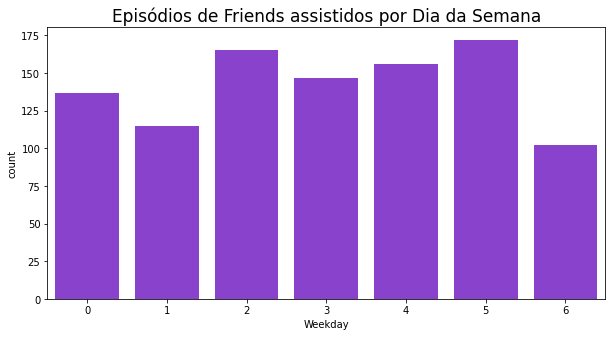

In [ ]:
print(friends.groupby('Weekday').agg({'Start_Time':'count'}))

# Monday=0, Sunday=6
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Weekday', data=friends, color='blueviolet')
ax.set_title('Episódios de Friends assistidos por Dia da Semana', fontsize=17);

> **Em que hora do dia eu assisto episódios de Friends com mais frequência?**



      Start_Time
Hour            
0             56
1             46
2             26
3             26
4             21
5             11
6              2
8              2
9             16
10            31
11            18
12           194
13            72
14            39
15            38
16            22
17            26
18            37
19            41
20            87
21            84
22            50
23            49


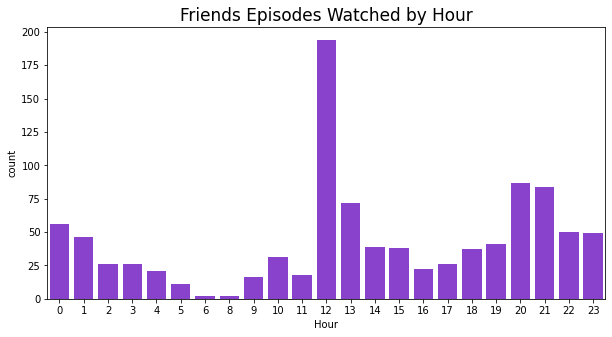

In [ ]:
print(friends.groupby('Hour').agg({'Start_Time':'count'}))

plt.figure(figsize=(10,5))
ax = sns.countplot(x='Hour', data=friends, color='blueviolet')
ax.set_title('Friends Episodes Watched by Hour', fontsize=17);

## **Análise de Dados - Brooklyn Nine-Nine**




In [ ]:
b99 = df[df['Title_Name'] == 'Brooklyn Nine-Nine']
b99.head()

,Start_Time,Duration,Title_Name,Season,Episode,Weekday,Hour
4,2020-11-10 00:48:43-02:00,0 days 00:01:54,Brooklyn Nine-Nine,Temporada 6,A minha palavra contra a dele (Episódio 8),1,0
5,2020-11-10 00:22:39-02:00,0 days 00:21:15,Brooklyn Nine-Nine,Temporada 6,A armadilha (Episódio 7),1,0
6,2020-11-10 00:15:15-02:00,0 days 00:07:22,Brooklyn Nine-Nine,Temporada 6,A cena do crime (Episódio 6),1,0
161,2020-11-01 15:12:38-02:00,0 days 00:02:51,Brooklyn Nine-Nine,Temporada 6,A cena do crime (Episódio 6),6,15
162,2020-11-01 15:11:31-02:00,0 days 00:00:50,Brooklyn Nine-Nine,Temporada 5,Torta e peru (Episódio 7),6,15


In [ ]:
b99 = b99[(b99['Duration'] > '0 days 00:02:00')]
b99.head()

,Start_Time,Duration,Title_Name,Season,Episode,Weekday,Hour
5,2020-11-10 00:22:39-02:00,0 days 00:21:15,Brooklyn Nine-Nine,Temporada 6,A armadilha (Episódio 7),1,0
6,2020-11-10 00:15:15-02:00,0 days 00:07:22,Brooklyn Nine-Nine,Temporada 6,A cena do crime (Episódio 6),1,0
161,2020-11-01 15:12:38-02:00,0 days 00:02:51,Brooklyn Nine-Nine,Temporada 6,A cena do crime (Episódio 6),6,15
319,2020-06-18 03:34:03-03:00,0 days 00:06:35,Brooklyn Nine-Nine,Temporada 5,Sargento Manteiga de Amendoim (Episódio 6),3,3
320,2020-06-18 03:30:17-03:00,0 days 00:03:40,Brooklyn Nine-Nine,Temporada 5,Jogatina (Episódio 5),3,3


> **Quanto tempo passei assistindo B99?**



In [ ]:
b99['Duration'].sum()

Timedelta('2 days 02:26:04')

> **Qual temporada de B99 eu mais assisti?**



In [ ]:
b99['Season'].value_counts()

 Temporada 5    72
 Temporada 1    66
 Temporada 4    59
 Temporada 2    39
 Temporada 3    39
 Temporada 6    17
Name: Season, dtype: int64

> **Quais foram os episódios mais assistidos em B99?**

In [ ]:
b99['Episode'].value_counts()

 Jogatina (Episódio 5)                         9
 Piloto (Episódio 1)                           6
 Um caso difícil (Episódio 21)                 6
 Lua de mel (Episódio 1)                       5
 Sargento Manteiga de Amendoim (Episódio 6)    5
                                              ..
 FBI (Episódio 22)                             1
 Os suecos (Episódio 9)                        1
 O descanso da defesa (Episódio 14)            1
 A 9-8 (Episódio 15)                           1
 Greg e Larry (Episódio 23)                    1
Name: Episode, Length: 118, dtype: int64


> **Em quais dias da semana eu assisti mais episódios de B99?**

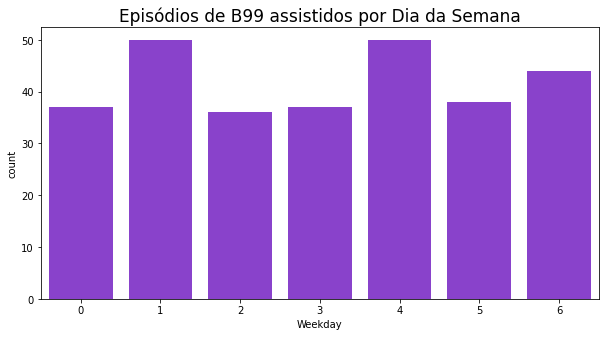

In [ ]:
#Monday=0, Sunday=6
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Weekday', data=b99, color='blueviolet')
ax.set_title('Episódios de B99 assistidos por Dia da Semana', fontsize=17);

> **Em que hora do dia eu assisto episódios de B99 com mais frequência?**



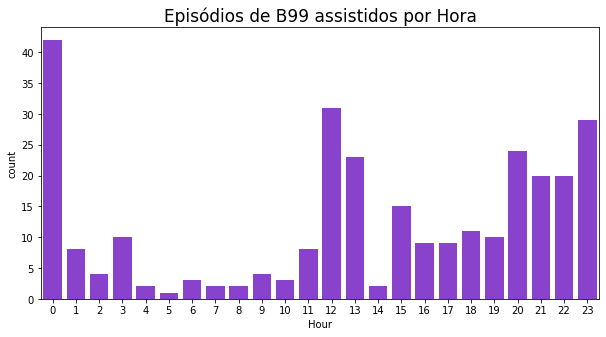

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Hour', data=b99, color='blueviolet')
ax.set_title('Episódios de B99 assistidos por Hora', fontsize=17);